In [14]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Specify the file path
base_path = r'C:\Programming\master_thesis\UnsupervisedConceptDriftDetection'

# Read the CSV files into pandas DataFrames
try:
    df_aust_nord = pd.read_csv(base_path + r'\datasets\files\filtered_austevoll_nord_data_astrid.csv', parse_dates=['Date'], index_col='Date')
    logger.info('Data files read successfully.')
except Exception as e:
    logger.error(f"Error reading files: {e}")
    raise



INFO:__main__:Data files read successfully.


In [28]:
# cut data within a continios time range:
#df_aust_nord.head()
df_aust_nord = df_aust_nord.loc['2022-12-01':'2023-06-01']
df_aust_nord['Conductivity']= df_aust_nord['Conductivity']*10
# Keep only the specified columns
df_aust_nord = df_aust_nord[['Pressure', 'Conductivity', 'Temperature', 'Salinity']]

# Display the dataframe info
df_aust_nord.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6986 entries, 2022-12-01 00:30:00 to 2023-04-29 17:00:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pressure      6986 non-null   float64
 1   Conductivity  6986 non-null   float64
 2   Temperature   6986 non-null   float64
 3   Salinity      6986 non-null   float64
dtypes: float64(4)
memory usage: 272.9 KB


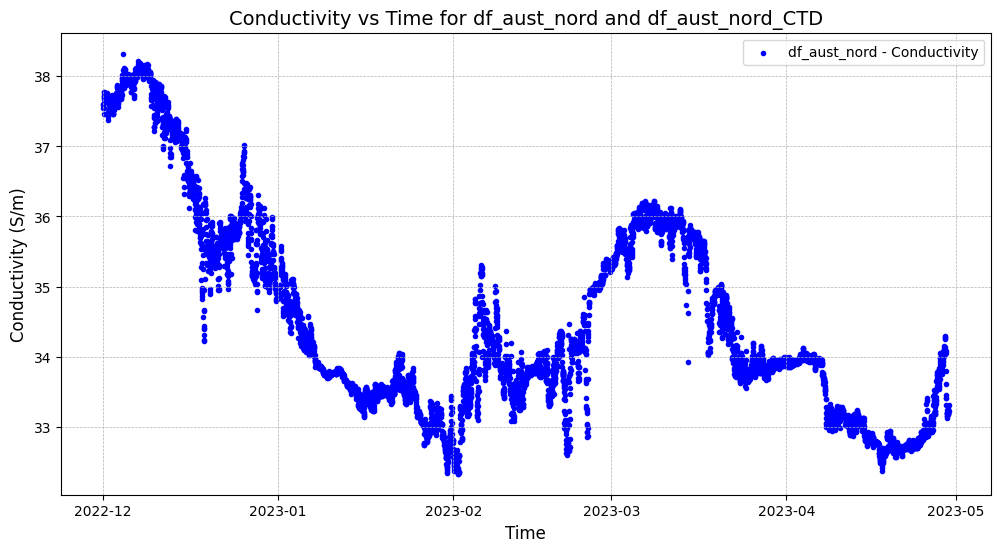

In [23]:
# Plot conductivity over time for both dataframes
plt.figure(figsize=(12, 6))

# Plot conductivity from df_aust_nord
plt.scatter(df_aust_nord.index, df_aust_nord['Conductivity'], label='df_aust_nord - Conductivity', color='blue', marker='.')

# Add labels and legend
plt.xlabel('Time', fontsize=12)
plt.ylabel('Conductivity (S/m)', fontsize=12)
plt.title('Conductivity vs Time for df_aust_nord and df_aust_nord_CTD', fontsize=14)
plt.legend(loc='upper right')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
# Set Y axis limits
#plt.ylim(0, 40)
# Display the plot
#plt.tight_layout()
plt.show()

In [31]:
df_aust_nord['class'] = 0
df_aust_nord.head()

,Pressure,Conductivity,Temperature,Salinity,class
Date,,,,,
2022-12-01 00:30:00,329.251,3760860.0,11.5427,33.0813,0
2022-12-01 01:00:00,329.736,3759650.0,11.5379,33.0737,0
2022-12-01 01:30:00,330.421,3755160.0,11.5299,33.0369,0
2022-12-01 02:00:00,331.136,3754840.0,11.5276,33.0358,0
2022-12-01 02:30:00,331.734,3745590.0,11.5005,32.9693,0


In [32]:
df_aust_nord.to_csv(base_path + r'\datasets\files\Austevoll_Nord_astrid_filtered_crop.csv')
logger.info('Dataframe saved to CSV successfully.')

INFO:__main__:Dataframe saved to CSV successfully.


In [ ]:
from os import path
from river.datasets import base
from river import stream

class AustevollNord(base.FileDataset):
    def __init__(self, directory_path: str = "datasets/files"):
        super().__init__(
            n_samples=6986,
            n_features=4,
            task=base.MULTI_CLF,
            filename="Austevoll_Nord_astrid_filtered_crop.csv",
        )
        self.full_path = path.join(directory_path, self.filename)

    def __iter__(self):
        converters = {
            "Pressure": float,
            "Conductivity": float,
            "Temperature": float,
            "Salinity": float,
            "class": int,
        }
        return stream.iter_csv(
            self.full_path,
            target="class",
            converters=converters,
        )